In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('D:\\w4ngg\\Kì 4\\Hoc may thong ke\\forest+fires\\forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [4]:
for col in df.columns:
    print(col, df[col].isnull().sum(), df[col].isna().sum())

X 0 0
Y 0 0
month 0 0
day 0 0
FFMC 0 0
DMC 0 0
DC 0 0
ISI 0 0
temp 0 0
RH 0 0
wind 0 0
rain 0 0
area 0 0


In [5]:
def convert_month(month:str) -> int:
    dict_month = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12,
    }
    return dict_month[month]
def convert_day(day:str) -> int:
    dict_day = {
        'mon': 0,
        'tue': 1,
        'wed': 2,
        'thu': 3,
        'fri': 4,
        'sat': 5,
        'sun': 6,
    }
    return dict_day[day]

In [6]:
df['day'] = df['day'].apply(convert_day)
df['month'] = df['month'].apply(convert_month)

In [7]:
df.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,0,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,0,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,1,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [8]:
X = df.to_numpy()[:, :-1]
y = df.to_numpy()[:, -1]
X_train, X_test = np.split(X, [int(0.8 * len(X))])
y_train, y_test = np.split(y, [int(0.8 * len(y))])
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((413, 12), (104, 12), (413,), (104,))

In [9]:

class MyLinearRegression:
    def __init__(self):
        self.w = None
    def fit(self,X,y):
        cov = X.T @ X 
        inv_cov = np.linalg.inv(cov)
        self.w = inv_cov @ (X.T @ y)
    def rmse(self,y,y_hat):
        delta = y_hat - y
        return (delta**2).mean()**0.5
    def predict(self,X):
        y_pred = np.matmul(self.w.T,X.T)
        return y_pred



Cau 1



In [10]:

lr1 = MyLinearRegression()
lr1.fit(X_train,y_train)
y_pred = lr1.predict(X_test)
lr1.rmse(y_test,y_pred)

79.98777585416212

In [11]:
lr1.w

array([  1.10050614,  -0.45029193,   2.91365808,   1.83374128,
        -0.0394413 ,   0.11030452,  -0.02604095,  -0.92652922,
         0.31788735,  -0.24756586,   0.02313453, -12.01475469])

Cau 2

In [12]:
X_norm = df.to_numpy()[:,:-1]
X_norm[:,4:12] = (X_norm[:,4:12] - X_norm[:,4:12].mean(axis=0)) / (X_norm[:,4:12].std(axis=0))


In [13]:
X_train_norm, X_test_norm = np.split(X_norm, [int(0.8 * len(X))])

In [14]:
lr2 = MyLinearRegression()
lr2.fit(X_train_norm,y_train)
y_pred = lr2.predict(X_test_norm)
lr2.rsme = lr2.rmse(y_test,y_pred)

In [15]:
lr2.rsme

79.95313335071651

In [16]:
lr2.w

array([ 0.97527622, -0.85183681,  0.83721208,  1.54781518,  0.34727424,
        6.1563604 , -1.54442994, -4.37058479,  1.63400745, -4.00337743,
        0.69382624, -3.24255778])

After normalization, the loss of model decreases a small amount. Probably the original data are distributed roughly the normal distribution with mean = 0 and variance = 1

Cau 3

In [17]:
calculate_corr_df = df.drop(columns=['X','Y','month','day'])
calculate_corr_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rai

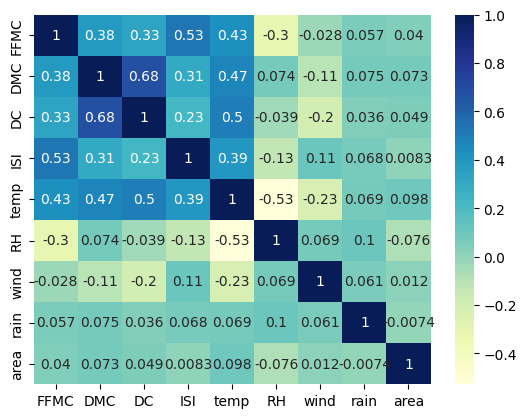

In [18]:
import seaborn as sb
import matplotlib.pyplot as mp
print(calculate_corr_df.corr())
dataplot = sb.heatmap(calculate_corr_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
mp.show()

In [19]:
#DC and DMC are quite highly correlated, so we can drop one of them
X_train_norm = np.delete(X_train_norm, 6, 1)
X_test_norm = np.delete(X_test_norm, 6, 1)
X_train_norm.shape, X_test_norm.shape

((413, 11), (104, 11))

In [20]:
lr3 = MyLinearRegression()
lr3.fit(X_train_norm,y_train)
y_pred = lr3.predict(X_test_norm)
lr3.rsme = lr3.rmse(y_test,y_pred)


In [21]:
lr3.rsme, lr3.w

(80.00989744314508,
 array([ 0.9810929 , -0.49454184,  0.55759284,  1.64421676,  0.34014745,
         5.5592589 , -4.34656576,  1.19756468, -4.26809936,  0.81080737,
        -3.2993028 ]))

In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
print(model.coef_)


79.98777585416208
[  1.10050614  -0.45029193   2.91365808   1.83374128  -0.0394413
   0.11030452  -0.02604095  -0.92652922   0.31788735  -0.24756586
   0.02313453 -12.01475469]
